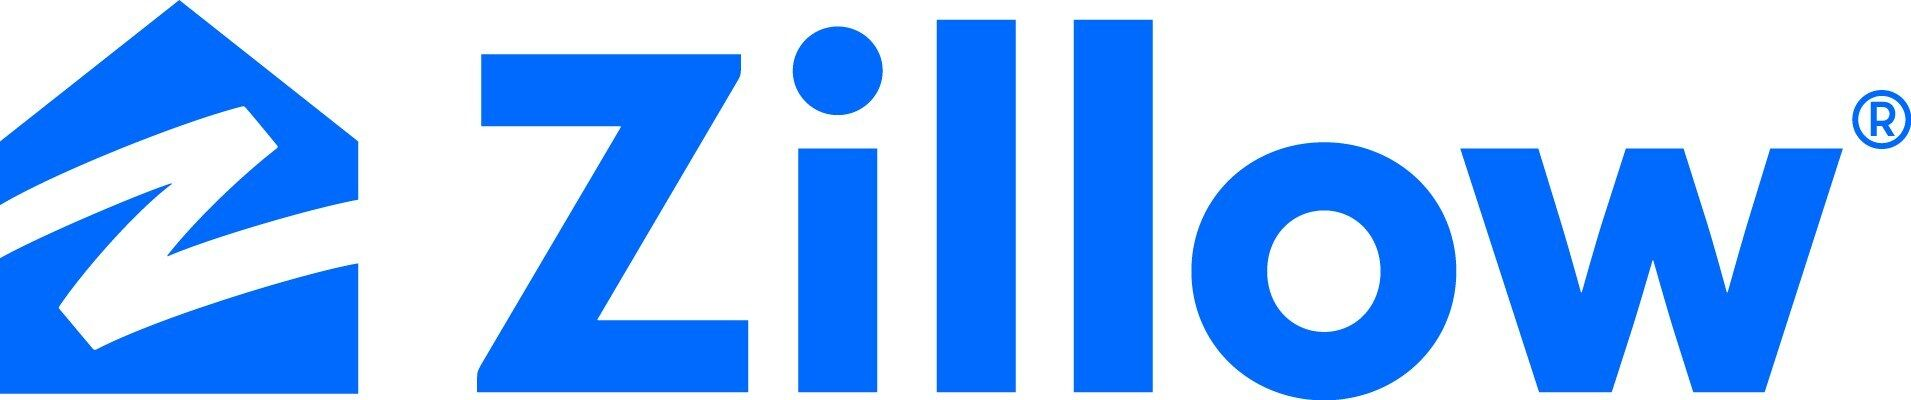

# Regression Project - Zillow_2017

Caroline Miller

April 10, 2023

O'Neil Data Science Cohort

**Goal:** knvddjbdhbhbhsbsublubvdlabvadiubvad;ibvaj;bfjvbbjbfjbvfjsb

**Project Description:** jsbsbvdub;vuddjbvhsbishovoidbvhdbvhbudbvjdbvjndjbvjbsbj vjkbjfd nvjcnbjbugbeugyudbeubgui

#### Imports

In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pydataset import data

import seaborn as sns
import evaluate
import scipy.stats as stats

### Acquire

In [2]:
zillow = wrangle.get_zillow_2017()
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52442 non-null  int64  
 1   parcelid                      52442 non-null  int64  
 2   bedroomcnt                    52442 non-null  float64
 3   bathroomcnt                   52442 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   taxvaluedollarcnt             52441 non-null  float64
 6   yearbuilt                     52326 non-null  float64
 7   taxamount                     52438 non-null  float64
 8   fips                          52442 non-null  float64
 9   propertylandusetypeid         52442 non-null  float64
 10  transactiondate               52442 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 4.4+ MB


This dataframe is acquired using a function which imports the dataframe from MySQL.

It joins three tables which results in 52,442 rows and 11 columns.

Each row represents a single family property, and each column represents a feature pretaining to that specific property.

### Prepare

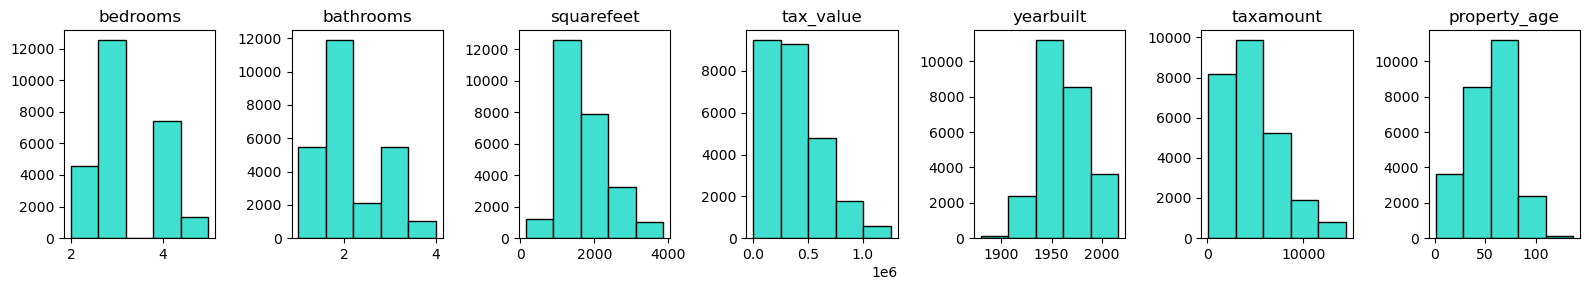

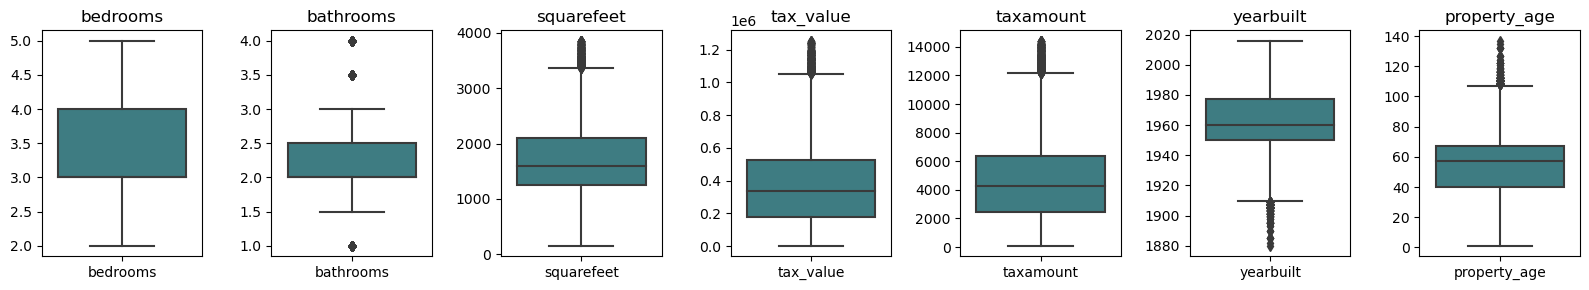

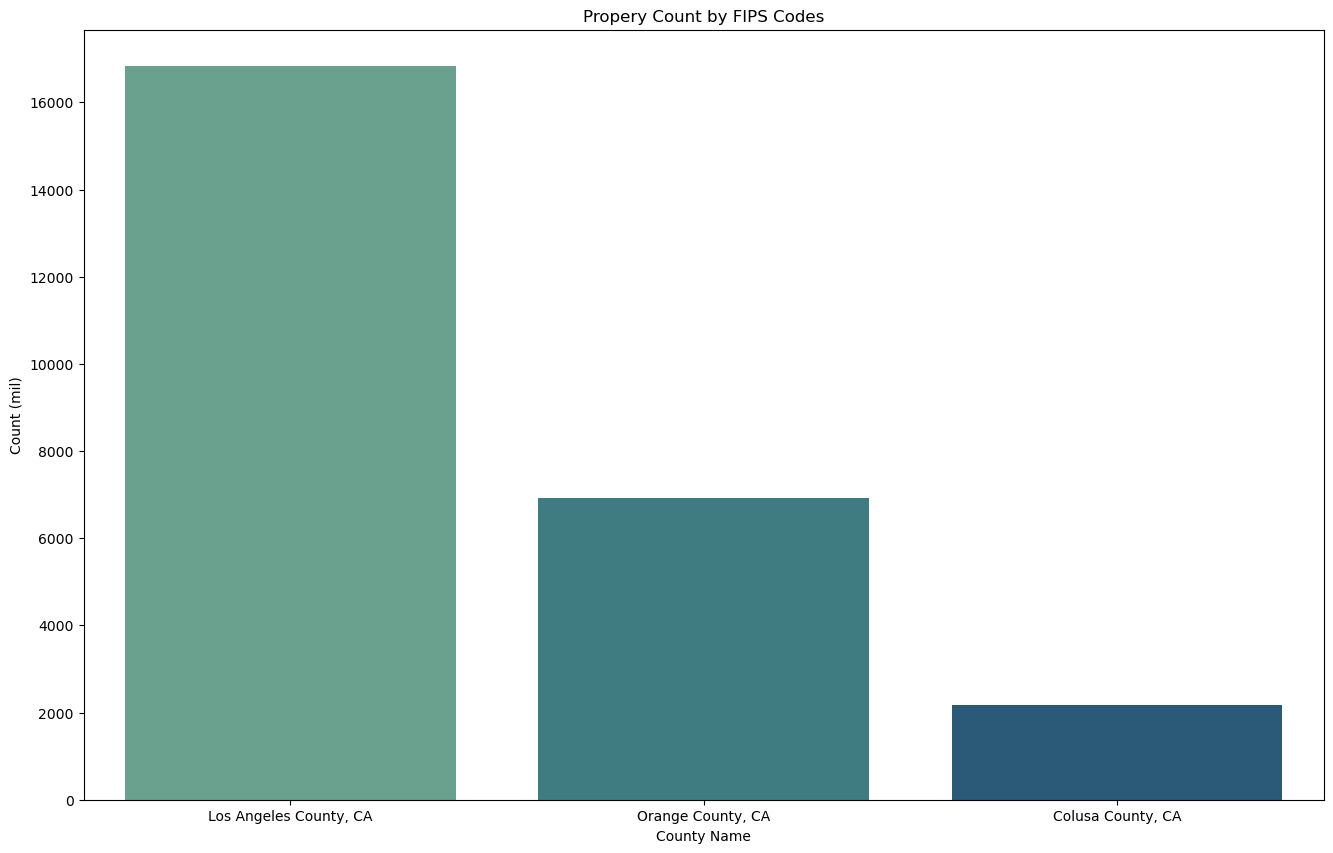

In [3]:
train, validate, test = wrangle.prepare_zillow(zillow)

The prepare function conducts the following on the dataframe:

    1. Drops the 'parcelid' column
    2. Converts the transaction date from an object datatype to a datetime datatype
    3. Renames a few columns
    4. Removes the outliers from all the int and float type features
    5. Adds a column containing the county and state to which the fips in pertaining 
    6. Splits the dataframe into a train, validate, and test dataframe 
    7. Uses the median strategy for the SimpleImputer to fill the NaN values with the median year in which the property was built
    8. Adds a column containing the age of the property by subtracting the year built by 2017
    9. Using the train dataframe, the function visualizes the continuous variables using histograms and boxplots, and the function visualizes the discrete varibales using a countplot
    10. Returns the train, validate, and test datasets

### Explore

Questions from the Zillow team:

    1. Find the key drivers of property value for single family properties. 
    2. Why do some properties have a much higher value than others when they are located so close to each other? 
    3. Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
    4.Is having 1 bathroom worse than having 2 bedrooms?

cat_cols: ['bedrooms', 'fips', 'propertytypeid', 'fips_location']
num_cols: ['bathrooms', 'squarefeet', 'tax_value', 'yearbuilt', 'taxamount', 'transactiondate', 'property_age']
Univariate assessment of feature bedrooms:


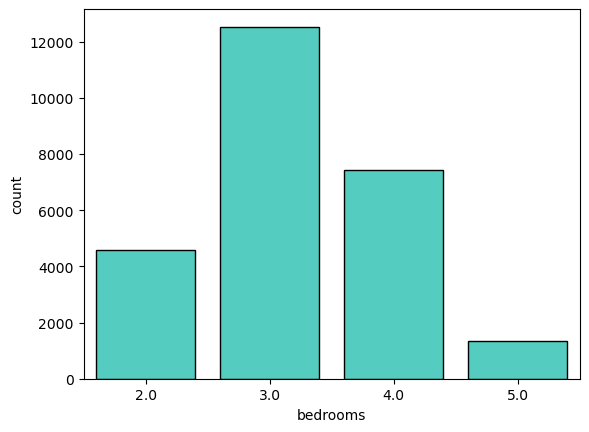

Univariate assessment of feature fips:


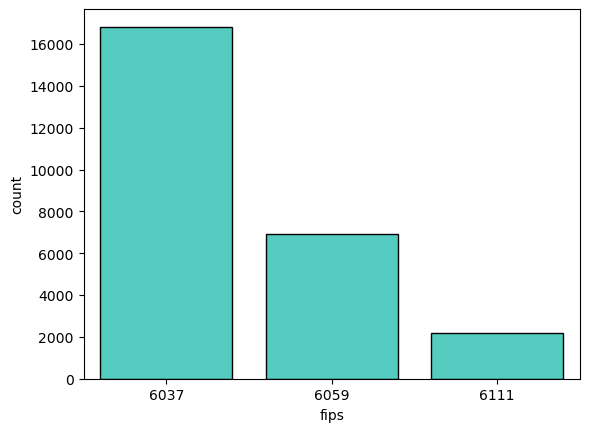

Univariate assessment of feature propertytypeid:


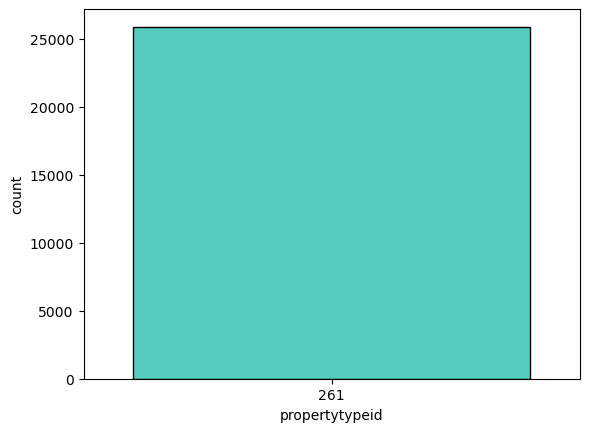

Univariate assessment of feature fips_location:


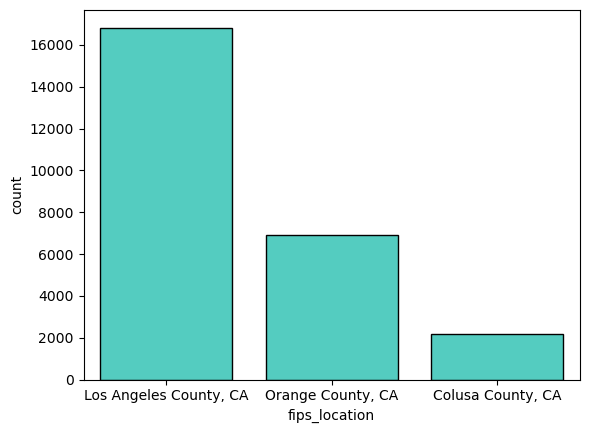

Univariate feature analysis of feature bathrooms: 


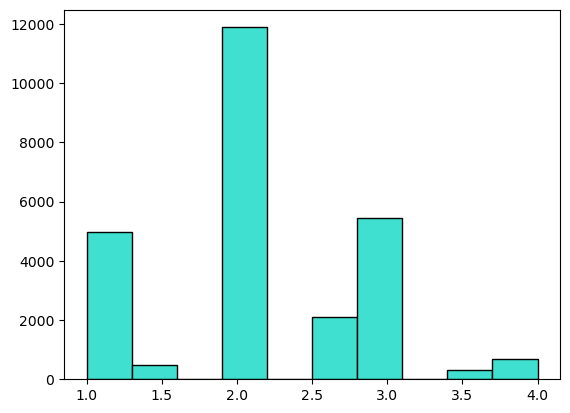

Univariate feature analysis of feature squarefeet: 


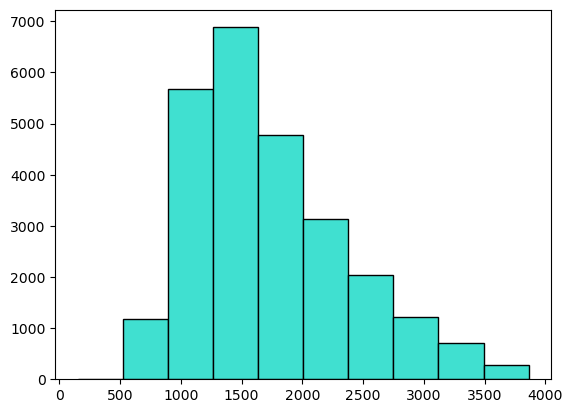

Univariate feature analysis of feature tax_value: 


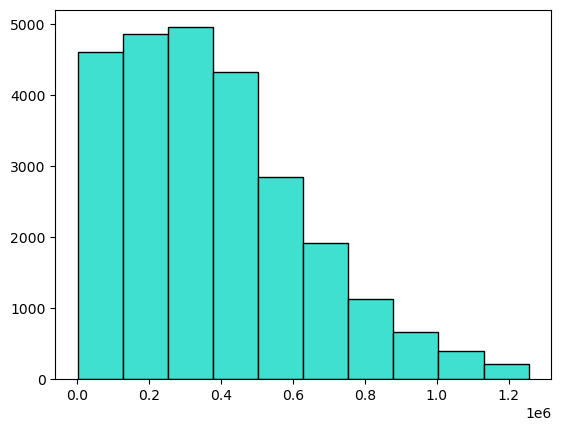

Univariate feature analysis of feature yearbuilt: 


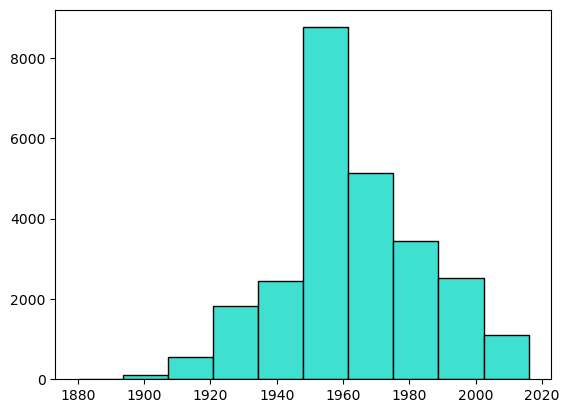

Univariate feature analysis of feature taxamount: 


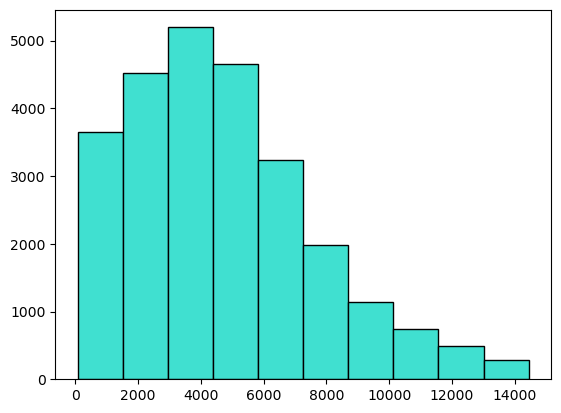

Univariate feature analysis of feature transactiondate: 


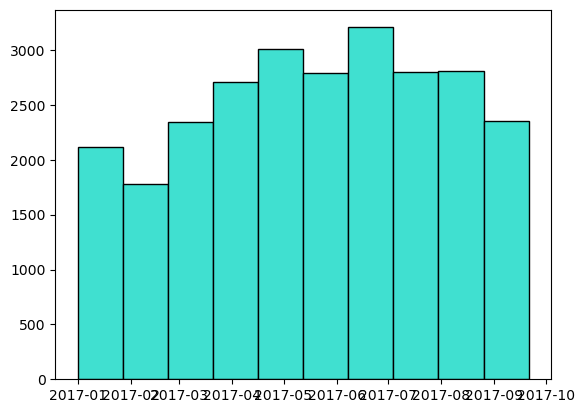

Univariate feature analysis of feature property_age: 


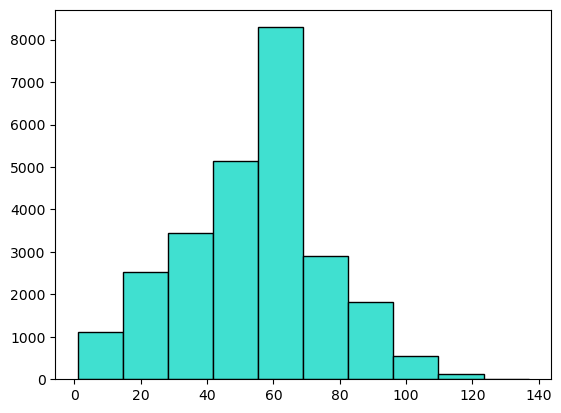

_____________________________________________________
_____________________________________________________

Numeric Columns: ['squarefeet', 'tax_value', 'yearbuilt', 'taxamount', 'transactiondate', 'property_age']
Categorical Columns: ['bedrooms', 'bathrooms', 'fips', 'propertytypeid', 'fips_location']
Bivariate assessment of feature bedrooms:


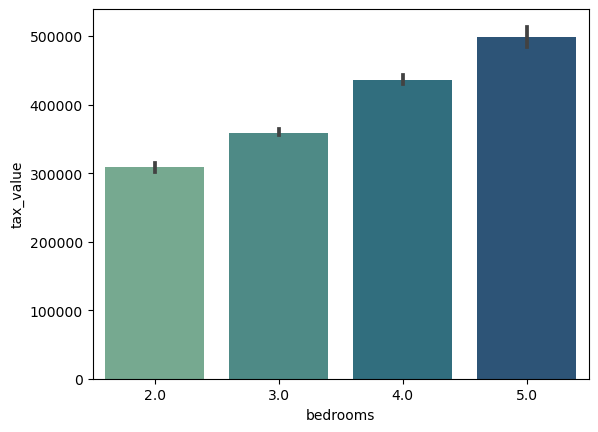

Bivariate assessment of feature bathrooms:


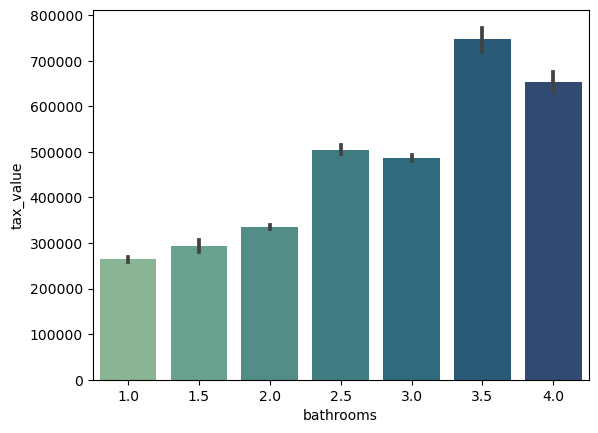

Bivariate assessment of feature fips:


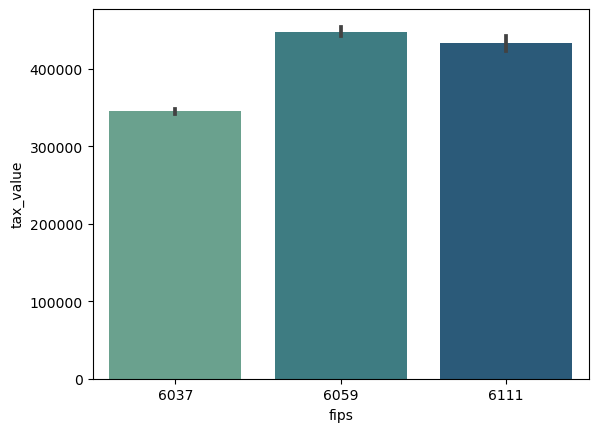

Bivariate assessment of feature propertytypeid:


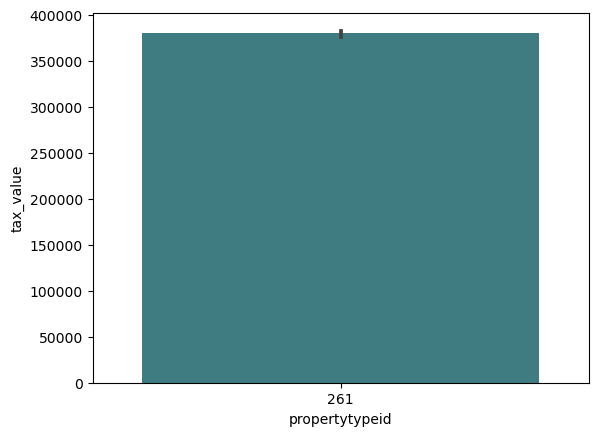

Bivariate assessment of feature fips_location:


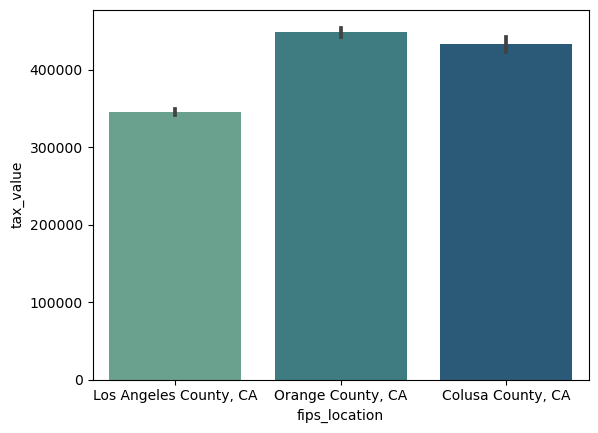

Bivariate feature analysis of feature squarefeet: 


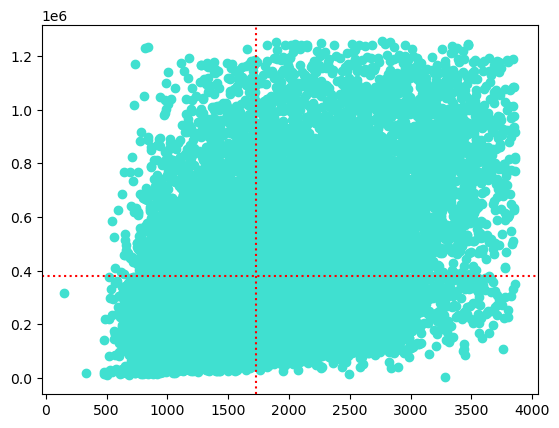

Bivariate feature analysis of feature yearbuilt: 


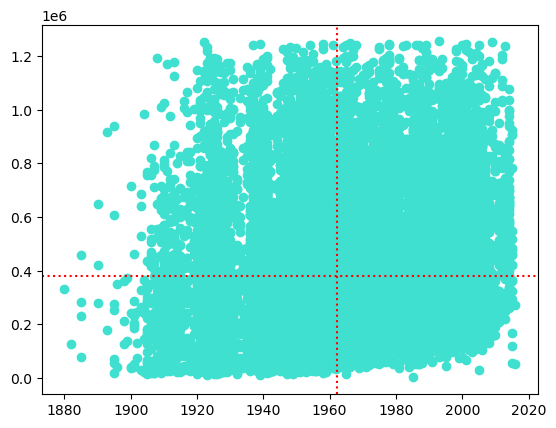

Bivariate feature analysis of feature taxamount: 


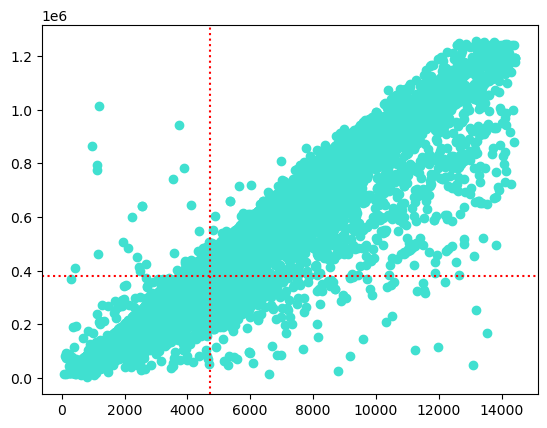

Bivariate feature analysis of feature transactiondate: 


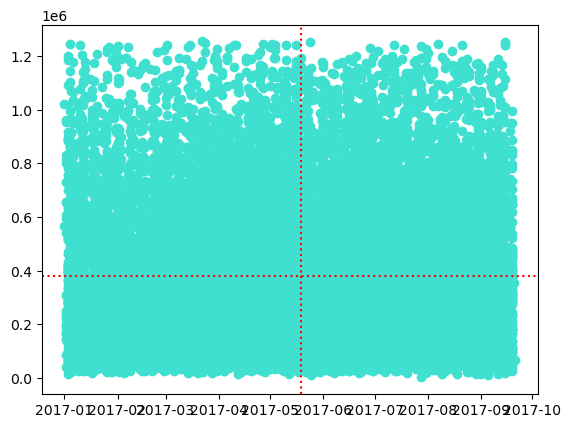

Bivariate feature analysis of feature property_age: 


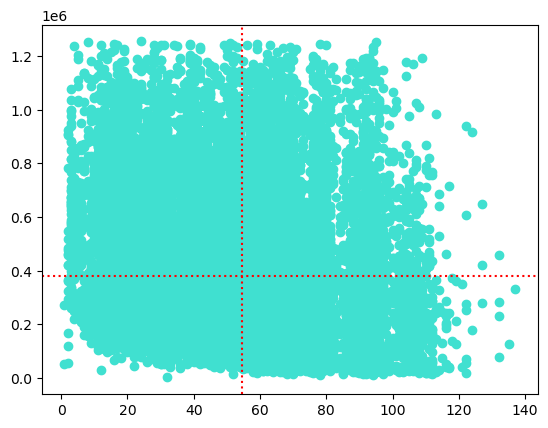

_____________________________________________________
_____________________________________________________



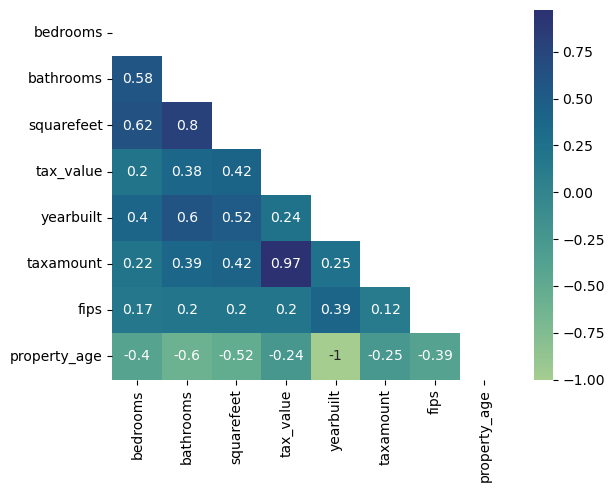

In [4]:
wrangle.viz_explore(train, 'tax_value')

**Key Findings:**